## Exercises

These exercises should go in a notebook or script named explore.

In [3]:
import pyspark.sql
from pyspark.sql.functions import *

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from wrangle import wrangle_311

spark = pyspark.sql.SparkSession.builder.getOrCreate()

df = wrangle_311(spark)
print("\ndf shape: (%d, %d)\n" % (df.count(), len(df.columns)))
df.show(1, vertical=True)

[wrangle.py] reading case.csv
[wrangle.py] handling data types
[wrangle.py] parsing dates
[wrangle.py] adding features
[wrangle.py] joining departments

df shape: (841704, 20)

-RECORD 0------------------------------------
 case_id              | 1014127332           
 case_opened_date     | 2018-01-01 00:42:00  
 case_closed_date     | 2018-01-01 12:29:00  
 case_due_date        | 2020-09-26 00:42:00  
 case_late            | false                
 num_days_late        | -998.5087616000001   
 case_closed          | true                 
 service_request_type | Stray Animal         
 SLA_days             | 999.0                
 case_status          | Closed               
 source_id            | svcCRMLS             
 request_address      | 2315  EL PASO ST,... 
 council_district     | 005                  
 num_weeks_late       | -142.6441088         
 zipcode              | 78207                
 case_age             | 219                  
 days_to_closed       | 0                

### Answer the questions below by using a combination of the techniques discussed in the lesson that you think is appropriate.

> How many different cases are there, by department?

In [20]:
df.groupby("department", "service_request_type").count().show()

+--------------------+--------------------+-----+
|          department|service_request_type|count|
+--------------------+--------------------+-----+
|Trans & Cap Impro...|Flashing Beacon N...|   78|
|         Solid Waste|Request for Comme...|  335|
|DSD/Code Enforcement|DSDB Ordered/Hold...|  225|
|        Metro Health| Public Right of Way|  538|
|  Parks & Recreation|Amenity Park Impr...|  112|
|Trans & Cap Impro...|    Speed Limit Sign|  288|
|  Parks & Recreation|               Pools|  131|
|DSD/Code Enforcement|Emergency: Main a...|   27|
|  Parks & Recreation|Brush/Debris Coll...|  261|
|Trans & Cap Impro...|School Flashers M...| 1754|
|         Solid Waste|    Lost/Stolen Cart|18731|
|  Parks & Recreation|         Playgrounds| 1438|
|Trans & Cap Impro...|Left-Turn Signal ...|  224|
|DSD/Code Enforcement|"Vacant Lot-City ...|  263|
|Trans & Cap Impro...|       Parking Issue|  588|
|DSD/Code Enforcement|Temporary Obstruc...|  143|
|  Parks & Recreation|        Parks Mowing|  221|


In [14]:
the_pandas_dataframe_we_know_and_love = df.groupBy("department", "service_request_type").count().toPandas()
the_pandas_dataframe_we_know_and_love

,department,service_request_type,count
0,Trans & Cap Improvements,Flashing Beacon New Request,78
1,Solid Waste,Request for Commercial Service,335
2,DSD/Code Enforcement,DSDB Ordered/Hold Harmless/Regular: ASEC,225
3,Metro Health,Public Right of Way,538
4,Parks & Recreation,Amenity Park Improvement,112
...,...,...,...
330,DSD/Code Enforcement,ADA Obstructions,1
331,DSD/Code Enforcement,Multi Tenant Exterior,84
332,City Council,CCO_Request for Research/Information_1,2
333,DSD/Code Enforcement,Storm Damage Report,2


In [15]:
type(the_pandas_dataframe_we_know_and_love)

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'How many cases does each department handle?')

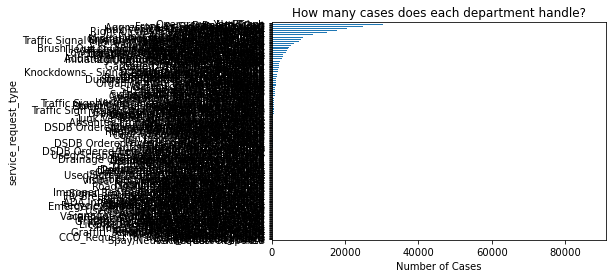

In [18]:
(
    df.groupBy("service_request_type")
    .count() # aggregate with spark
    .toPandas() # converts to a pandas dataframe
    .set_index('service_request_type')
    ['count'] # a single pandas series
    .sort_values()
    .plot.barh() # pandas built-in plotting
)
plt.xlabel('Number of Cases')
plt.title('How many cases does each department handle?')

In [22]:
numeric_cols = [
    "num_days_late",
    "SLA_days",
    "case_age",
    "days_to_closed",
    "case_lifetime",
]

sns.pairplot(the_pandas_dataframe_we_know_and_love[numeric_cols])

KeyError: "None of [Index(['num_days_late', 'SLA_days', 'case_age', 'days_to_closed',\n       'case_lifetime'],\n      dtype='object')] are in the [columns]"

 > Does the percentage of cases that are late vary by department?

> On average, how late are the late cases by department?

> What is the service type that is the most late? Just for Parks & Rec?

> For the DSD/Code Enforcement department, what are the most common service request types? Look at other departments too.

> Does whether or not its a weekend matter for when a case is opened/closed?

> On average, how many cases are opened a day for the Customer Service department?

> Does the number of service requests for the solid waste department vary by day of the week?